# ***Preferencias en el Uso de Canales***
Por Tatiana Molina - Carolina Alvarez

## **0. Introducción:**

El análisis presentado se hace a partir de una muestra de 10.000 contactos de clientes de una fondo de pensiones y cesantías de Colombia ente enero de 2019 y mayo de 2020.

**Alcance:**
* Contacto por canales asistidos
* Clientes personas (se exluyen empleadores ya que desde el negocio sabemos que se comportan muy diferente


## **1. Consultar la base de datos de contactos y clientes**

Realizamos una lectura de los datos del repositorio para consultas de la organización (Google Cloud), al tratarse de datos confidenciales no es posible ejecutar estas celdas desde fuentes externas,  la conexión a la base de datos y los query se omiten.

Para este primer análisis utilizamos los datos de contactos de los clientes originados de la plataforma de CRM que realizaron desde enero de 2019 a mayo de 2020. Adicional a esto extrajimos información de segmentación de los clientes y datos como (Edad, ubicación …)para su clasificación. 


Nota: Debito a temas de seguridad y privacidad de los datos se eliminaron algunos elementos como los querys con los que se realizaron la consulta de la base de datos, por tanto no podemos acceder a la fuente de datos lo que significa que el notebook no es ejecutable. Este puede ser utilizado para consulta de codigo y resultados

In [ ]:
from google.cloud import bigquery

In [ ]:
client = bigquery.Client(location="US")

In [ ]:
query = """
SELECT 
"""
query_job = client.query(query, location="US",) # API request - starts the query

In [ ]:
df = query_job.to_dataframe()

## **2. Identificación de variables**

In [ ]:
#Canal de contacto al cual llega el cliente en cada iteración
df['descCanalRadicacion'].unique()

array(['LÍNEA DE SERVICIO AFILIADOS', 'ESTRUCTURA COMERCIAL',
       'OFICINA DE SERVICIO', 'EMPLEADO/TERCERO', 'LÍNEA DE SERVICIO',
       'PORTAL WEB / NO AUTENTICADO', 'GESTIÓN DOCUMENTAL', 'PORTAL  WEB',
       'CENTRO DE EXPERIENCIA VIRTUAL', 'CORREO ELECTRÓNICO',
       'OFICINA VIRTUAL', 'LÍNEA DE SERVICIO EMPRESAS',
       'EJECUTIVO DE ASISTENCIA EMPRESARIAL', 'MESA DE APOYO',
       'SIN CLASIFICAR', 'GESTION DOCUMENTAL', 'CHAT ASESOR',
       'COMERCIAL NI', 'COMERCIAL WM', 'PROCESO'], dtype=object)

In [ ]:
# unificar canales con nombre equivalente
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('LÍNEA DE SERVICIO', 'LINEA DE SERVICIO')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('LÍNEA DE SERVICIO AFILIADOS', 'LINEA DE SERVICIO')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('PORTAL WEB / NO AUTENTICADO', 'PORTAL  WEB')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('GESTION DOCUMENTAL', 'GESTIÓN DOCUMENTAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('COMERCIAL WM', 'ESTRUCTURA COMERCIAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('COMERCIAL NI', 'ESTRUCTURA COMERCIAL')
df['descCanalRadicacion'] = df['descCanalRadicacion'].replace('CENTRO DE EXPERIENCIA VIRTUAL', 'OFICINA VIRTUAL')

In [ ]:
df['descCanalRadicacion'].unique()

array(['LINEA DE SERVICIO', 'ESTRUCTURA COMERCIAL', 'OFICINA DE SERVICIO',
       'EMPLEADO/TERCERO', 'PORTAL  WEB', 'GESTIÓN DOCUMENTAL',
       'OFICINA VIRTUAL', 'CORREO ELECTRÓNICO',
       'LÍNEA DE SERVICIO EMPRESAS',
       'EJECUTIVO DE ASISTENCIA EMPRESARIAL', 'MESA DE APOYO',
       'SIN CLASIFICAR', 'CHAT ASESOR', 'PROCESO'], dtype=object)

In [ ]:
# los canales marcados como Empleado / tercero o Sin clasificar no se pueden asociar con un canal de servicio, se pueden eliminar
df.groupby(df['descCanalRadicacion']).count()['afi_hash64'].sort_values()

descCanalRadicacion
MESA DE APOYO                             1
PROCESO                                   1
SIN CLASIFICAR                           18
CHAT ASESOR                              22
EJECUTIVO DE ASISTENCIA EMPRESARIAL      22
LÍNEA DE SERVICIO EMPRESAS               39
CORREO ELECTRÓNICO                       63
EMPLEADO/TERCERO                         76
OFICINA VIRTUAL                         122
PORTAL  WEB                             166
ESTRUCTURA COMERCIAL                    406
GESTIÓN DOCUMENTAL                      477
OFICINA DE SERVICIO                    4136
LINEA DE SERVICIO                      4451
Name: afi_hash64, dtype: int64

In [ ]:
#Eliminamos medios de contacto no reconocidos como canales o que son para atención de empresas ya que no estan dentro del alcance del proeycto
df=df.drop(df[df['descCanalRadicacion'] == 'EMPLEADO/TERCERO'].index) #interno
df=df.drop(df[df['descCanalRadicacion'] == 'MESA DE APOYO'].index) #interno
df=df.drop(df[df['descCanalRadicacion'] == 'SIN CLASIFICAR'].index) # no identificado
df=df.drop(df[df['descCanalRadicacion'] == 'PROCESO'].index) #interno
df=df.drop(df[df['descCanalRadicacion'] == 'LÍNEA DE SERVICIO EMPRESAS'].index) # no es público objetivo
df=df.drop(df[df['descCanalRadicacion'] == 'EJECUTIVO DE ASISTENCIA EMPRESARIAL'].index) # no es público objetivo
df.groupby(df['descCanalRadicacion']).count()['afi_hash64'].sort_values(ascending = False)

descCanalRadicacion
LINEA DE SERVICIO       4451
OFICINA DE SERVICIO     4136
GESTIÓN DOCUMENTAL       477
ESTRUCTURA COMERCIAL     406
PORTAL  WEB              166
OFICINA VIRTUAL          122
CORREO ELECTRÓNICO        63
CHAT ASESOR               22
Name: afi_hash64, dtype: int64

In [ ]:
#Tema: motivo del contacto
df.groupby(df['descTema']).count()['afi_hash64']

descTema
ACTUALIZACIÓN DE DATOS                                           1380
ACTUALIZACIÓN DE DATOS (AFILIADO-SER)                              35
ACTUALIZACIÓN DE DATOS (EMPLEADOR-SER)                              2
AFILIACIONES Y TRASLADOS                                          630
AFILIACIÓN Y TRASLADO DE ENTRADA (AFILIADO-SER)                    12
ALIANZAS                                                            3
APORTES Y PLANILLAS                                              1679
APORTES Y PLANILLAS (AFILIADO-SER)                                  8
ASESORÍA PENSIONAL (AFILIADO-SER)                                 179
ASESORÍA PENSIONAL (EMPLEADOR-SER)                                  1
BENEFICIOS Y PENSIONES                                            423
CANALES DE ATENCIÓN Y/O ASESORÍA                                 2109
CANALES DE SERVICIO (AFILIADO-SER)                                 21
CANALES DE SERVICIO (EMPLEADOR-SER)                                 1
CERTIFICADO

In [ ]:
#homologar tipologias equivalentes
df['descTema'] = df['descTema'].replace('ACTUALIZACIÓN DE DATOS (AFILIADO-SER)', 'ACTUALIZACIÓN DE DATOS')
df['descTema'] = df['descTema'].replace('ACTUALIZACIÓN DE DATOS (EMPLEADOR-SER)', 'ACTUALIZACIÓN DE DATOS')
df['descTema'] = df['descTema'].replace('ACTUALIZACIÓN DE DATOS (NO CLIENTE-SER)', 'ACTUALIZACIÓN DE DATOS')
df['descTema'] = df['descTema'].replace('AFILIACIÓN Y TRASLADO DE ENTRADA (AFILIADO-SER)', 'AFILIACIONES Y TRASLADOS')
df['descTema'] = df['descTema'].replace('AFILIACIÓN Y TRASLADO DE ENTRADA (EMPLEADOR-SER)', 'AFILIACIONES Y TRASLADOS')
df['descTema'] = df['descTema'].replace('TRASLADOS DE SALIDA Y CANCELACIÓN DE PRODUCTOS (AFILIADO-SER)', 'AFILIACIONES Y TRASLADOS')
df['descTema'] = df['descTema'].replace('APORTES Y PLANILLAS (EMPLEADOR-SER)', 'APORTES Y PLANILLAS')
df['descTema'] = df['descTema'].replace('APORTES Y PLANILLAS (AFILIADO-SER)', 'APORTES Y PLANILLAS')
df['descTema'] = df['descTema'].replace('ASESORÍA PENSIONAL (AFILIADO-SER)', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('BENEFICIOS Y PENSIONES', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('HISTORIA LABORAL PARA BONO PENSIONAL', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('ASESORÍA PENSIONAL (EMPLEADOR-SER)', 'ASESORÍA PENSIONAL')
df['descTema'] = df['descTema'].replace('CANALES DE SERVICIO (AFILIADO-SER)', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CANALES DE ATENCIÓN Y/O ASESORÍA', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CANALES DE SERVICIO (EMPLEADOR-SER)', 'CANALES DE ATENCIÓN')
df['descTema'] = df['descTema'].replace('CERTIFICADOS Y EXTRACTOS (AFILIADO-SER)', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('CERTIFICADOS, CONSTANCIAS Y EXTRACTOS', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('CERTIFICADOS Y EXTRACTOS (EMPLEADOR-SER)', 'CERTIFICADOS')
df['descTema'] = df['descTema'].replace('DEUDAS E INCONSISTENCIAS (EMPLEADOR-SER)', 'DEUDAS E INCONSISTENCIAS')
df['descTema'] = df['descTema'].replace('INCONSISTENCIAS Y COBRO', 'DEUDAS E INCONSISTENCIAS')
df['descTema'] = df['descTema'].replace('PAGOS Y RETIROS (AFILIADO-SER)', 'PAGOS Y RETIROS')
df['descTema'] = df['descTema'].replace('RETIROS', 'PAGOS Y RETIROS')
df['descTema'] = df['descTema'].replace('PENSIONADO (AFILIADO-SER)', 'PENSIONADO')
df['descTema'] = df['descTema'].replace('SALDOS Y RENTABILIDADES (AFILIADO-SER)', 'SALDOS Y RENTABILIDADES')
df['descTema'] = df['descTema'].replace('MOVIMIENTOS DE CUENTA (AFILIADO-SER)', 'MOVIMIENTOS DE CUENTA')
df['descTema'] = df['descTema'].replace('EMBARGOS, PIGNORACIONES E INMOVILIZACIONES (AFILIADO-SER)', 'MOVIMIENTOS DE CUENTA')

In [ ]:
df.groupby(df['descTema']).count()['afi_hash64']

descTema
ACTUALIZACIÓN DE DATOS                        1417
AFILIACIONES Y TRASLADOS                       648
ALIANZAS                                         3
APORTES Y PLANILLAS                           1687
ASESORÍA PENSIONAL                             764
CANALES DE ATENCIÓN                           2131
CERTIFICADOS                                  2413
DEUDAS E INCONSISTENCIAS                       237
GENÉRICO MIGRACIÓN SER                           1
INFORMACIÓN Y COMUNICACIONES                   264
MOVIMIENTOS DE CUENTA                           14
PAGOS Y RETIROS                                212
PENSIONADO                                      10
PLANES INSTITUCIONALES Y RENTAS TEMPORALES       1
PQRS (AFILIADO-SER)                              4
RESARCIMIENTO                                    8
SALDOS Y RENTABILIDADES                         22
SOCIEDAD ADMINISTRADORA                          1
Name: afi_hash64, dtype: int64

In [ ]:
#Eliminar temas de contacto que no son representativos debido a su volumen
df=df.drop(df[df['descTema'] == 'ALIANZAS'].index)
df=df.drop(df[df['descTema'] == 'GENÉRICO MIGRACIÓN SER'].index)
df=df.drop(df[df['descTema'] == 'PLANES INSTITUCIONALES Y RENTAS TEMPORALES'].index)
df=df.drop(df[df['descTema'] == 'PQRS (AFILIADO-SER)'].index)
df=df.drop(df[df['descTema'] == 'SOCIEDAD ADMINISTRADORA'].index)
df=df.drop(df[df['descTema'].isnull()].index)

In [ ]:
df['descTema'].unique()

array(['PAGOS Y RETIROS', 'ACTUALIZACIÓN DE DATOS', 'APORTES Y PLANILLAS',
       'CANALES DE ATENCIÓN', 'ASESORÍA PENSIONAL', 'CERTIFICADOS',
       'INFORMACIÓN Y COMUNICACIONES', 'AFILIACIONES Y TRASLADOS',
       'SALDOS Y RENTABILIDADES', 'DEUDAS E INCONSISTENCIAS',
       'RESARCIMIENTO', 'MOVIMIENTOS DE CUENTA', 'PENSIONADO'],
      dtype=object)

In [ ]:
#Sexo del cliente
df['descSexo'].unique()

array(['MASCULINO', 'FEMENINO', None], dtype=object)

In [ ]:
#Cuantos clientes tenemos sin la información de sexo?
df[df['descSexo'].isnull()].count()

afi_hash64              1529
fkFechaCreacionPQR      1529
descCanalRadicacion     1529
descTema                1529
descSexo                   0
edadAfiliado             275
dtmFechaNacimiento       127
descCiudadUbicacion      223
idCiudadUbicacion        223
descSegmentoAfiliado     275
EstadoPO                   7
EstadoPV                   1
EstadoCES                272
dtype: int64

In [ ]:
#los datos sin sexo también tiene vacios otros datos importantes para caraterizar al cliente, por lo tanto se eliminan de la base de datos
df=df.drop(df[df['descSexo'].isnull()].index)
df= df.drop(df[df['idCiudadUbicacion'].isnull()].index)
df=df.drop(df[df['idCiudadUbicacion'] == 'SINCLASIF'].index)
df=df.drop(df[df['descCiudadUbicacion'] == 'SEDE ADMINISTRATIVA MEDELLIN'].index)
df=df.drop(df[df['idCiudadUbicacion'] == 'VE007'].index)

In [ ]:
df['descSexo'].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [ ]:
#Segmento asignado al afiliado del afiliado 
df['descSegmentoAfiliado'].unique()

array(['RENTAS MEDIAS A', 'PRIME', 'NO SEGMENTADO', 'RENTAS MASIVAS B',
       'RENTAS MASIVAS C', 'SIN SEGMENTO', 'ALTO VALOR',
       'ALTO PATRIMONIO'], dtype=object)

In [ ]:
#Agrupemos los segmentos en categorías para facilitar el análisis

df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('RENTAS MASIVAS B', 'RENTAS MASIVAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('RENTAS MASIVAS C', 'RENTAS MASIVAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('SIN SEGMENTO', 'NO SEGMENTADO')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('RENTAS MEDIAS A', 'RENTAS MEDIAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('ALTO PATRIMONIO', 'RENTAS ALTAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('ALTO VALOR', 'RENTAS ALTAS')
df['descSegmentoAfiliado'] = df['descSegmentoAfiliado'].replace('PRIME', 'RENTAS ALTAS')


In [ ]:
df.descSegmentoAfiliado.unique()

array(['RENTAS MEDIAS', 'RENTAS ALTAS', 'NO SEGMENTADO', 'RENTAS MASIVAS'],
      dtype=object)

In [ ]:
#Analsis del estado del cliente en los productos

print('PO',df.EstadoPO.unique())
print('PV',df.EstadoPV.unique())
print('CES',df.EstadoCES.unique())

PO ['ACTIVO' None 'PENSIONADO' 'RETIRO DE SALDO' 'INACTIVO' 'TRASLADADO']
PV [None 'ACTIVO' 'INACTIVO']
CES ['ACTIVO' None 'INACTIVO' 'SIN CLASIFICAR']


In [ ]:
#Actualizamos los estados para manejar categorias unificadas

df['EstadoPO'] = df['EstadoPO'].replace('TRASLADADO', 'INACTIVO')
df['EstadoPO'] = df['EstadoPO'].replace('RETIRO DE SALDO', 'INACTIVO')
df['EstadoCES'] = df['EstadoCES'].replace('SIN CLASIFICAR', 'INACTIVO')

#Identificamos que los clientes sin información en el producto es porque nunca lo han tenido, por lo tanto hacemos el reemplazo de los datos
df['EstadoPO'] = df['EstadoPO'].fillna("NoTiene")
df['EstadoPV'] = df['EstadoPV'].fillna("NoTiene")
df['EstadoCES'] = df['EstadoCES'].fillna("NoTiene")

In [ ]:
print("Ahorro Obligatorio",df.EstadoPO.unique())
print("Ahorro Voluntario", df.EstadoPV.unique())
print("Cesantias", df.EstadoCES.unique())

Ahorro Obligatorio ['ACTIVO' 'NoTiene' 'PENSIONADO' 'INACTIVO']
Ahorro Voluntario ['NoTiene' 'ACTIVO' 'INACTIVO']
Cesantias ['ACTIVO' 'NoTiene' 'INACTIVO']


In [ ]:
df.head()

,afi_hash64,fkFechaCreacionPQR,descCanalRadicacion,descTema,descSexo,edadAfiliado,dtmFechaNacimiento,descCiudadUbicacion,idCiudadUbicacion,descSegmentoAfiliado,EstadoPO,EstadoPV,EstadoCES
0,2330dc599d0baea80d7b4e6f41826a8b66c5d433,20200708,LINEA DE SERVICIO,PAGOS Y RETIROS,MASCULINO,20.0,1999-12-18,BOGOTÁ,11001,RENTAS MEDIAS,ACTIVO,NoTiene,ACTIVO
1,5a1cc8227d69e317a23a4f2a734adae785b68a23,20160713,ESTRUCTURA COMERCIAL,ACTUALIZACIÓN DE DATOS,FEMENINO,83.0,1937-06-26,PEREIRA,66001,RENTAS ALTAS,NoTiene,ACTIVO,NoTiene
2,5a1cc8227d69e317a23a4f2a734adae785b68a23,20180523,ESTRUCTURA COMERCIAL,ACTUALIZACIÓN DE DATOS,FEMENINO,83.0,1937-06-26,PEREIRA,66001,RENTAS ALTAS,NoTiene,ACTIVO,NoTiene
3,f2c47c848905ea641555adeeeefb15358059ef50,20160425,OFICINA DE SERVICIO,APORTES Y PLANILLAS,MASCULINO,70.0,1950-05-27,CALI,76001,NO SEGMENTADO,NoTiene,NoTiene,INACTIVO
4,0c7654662c8e2337e4ab390a5e79108b3ec78672,20160420,OFICINA DE SERVICIO,APORTES Y PLANILLAS,FEMENINO,71.0,1949-08-17,MEDELLÍN,05001,RENTAS MASIVAS,NoTiene,ACTIVO,NoTiene


## **3. Tratamiento de datos duplicados**

In [ ]:
# ¿Cuántos datos quedan despues de la limpieza de datos?
df.count()['afi_hash64']

8146

In [ ]:
#¿A cuántos clientes corresponden estos contactos?
len(df.afi_hash64.unique())

3034

In [ ]:
#Clientes con mayor reincidencia
df.groupby(df['afi_hash64']).count()['fkFechaCreacionPQR'].sort_values(ascending = False)

afi_hash64
6f75b659ea2c280e3996c92c25c7085a3236dde6    34
fa222c5fa86b8d7aa1ded42d15a0c81827c60dba    30
f3ad0c980c1bd5504637f54f9d8626af2d0c2f80    26
9d6ee37bae25f072933c67d04792874d31bf5f73    26
37dcfa6ca7b45eb00e00f2fe607c8f50abc17b1c    25
                                            ..
71918b177fe3f70f100d4a49d91fa903d41f47e6     1
71b62c8c316501eab4b1e6c0f05718703c427b66     1
71b688a485db780f17133f770a427a794606ff03     1
71f4ab102e8cd502a293f44d66bd2b71192dcf90     1
e681af716a1a8f1c70c765a5fd8095a5901ae82e     1
Name: fkFechaCreacionPQR, Length: 3034, dtype: int64

**¿Deberíamos trabajar solo con clientes únicos?**
Para una siguiente iteración es necesario trabajar con clientes únicos, identificando por ejemplo el canal que más usa cada cliente y ingresando variables adicionales que logren diferenciar los contactos de un mismo cliente.

## **4. Analisis Univariable**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

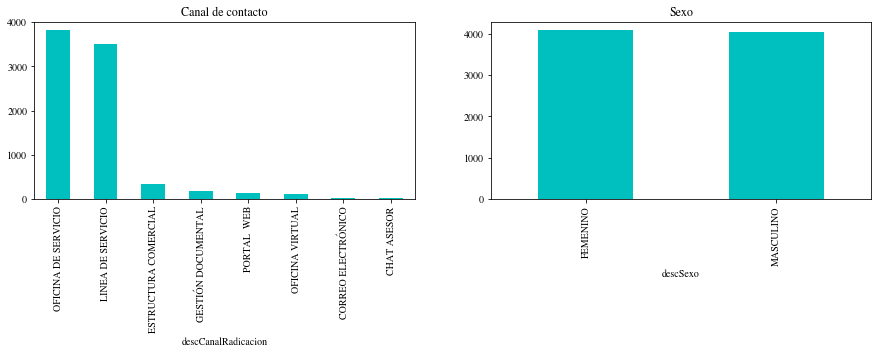

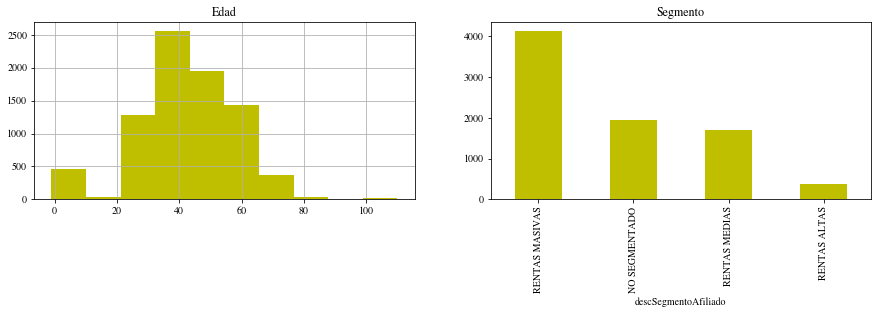

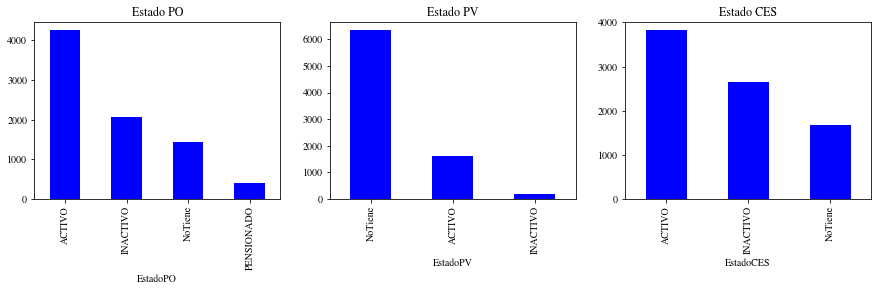

Text(0.5, 1.0, 'Tema de contacto')

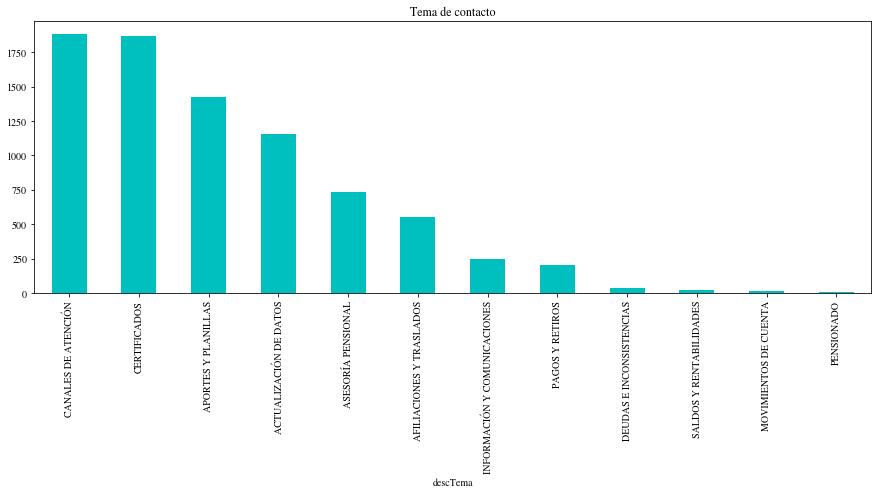

In [ ]:
#Veamos gráficamente como se comporta cada una de las variables

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df.groupby(df['descCanalRadicacion']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'c')
plt.title('Canal de contacto')

ax = fig.add_subplot(4, 2, 2)
df.groupby(df['descSexo']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'c')
plt.title('Sexo')

plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
df['edadAfiliado'].hist(color = 'y')
plt.title('Edad')

ax = fig.add_subplot(4, 2, 2)
df.groupby(df['descSegmentoAfiliado']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'y')
plt.title('Segmento')

plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(4, 3, 1)
df.groupby(df['EstadoPO']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'b')
plt.title('Estado PO')

ax = fig.add_subplot(4, 3, 2)
df.groupby(df['EstadoPV']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'b')
plt.title('Estado PV')

ax = fig.add_subplot(4, 3, 3)
df.groupby(df['EstadoCES']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'b')
plt.title('Estado CES')

plt.show()

fig = plt.figure(figsize=(15,5))
df.groupby(df['descTema']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'c')
plt.title('Tema de contacto')



**Importante**

* Podemos notar que los datos estan muy desbalanceados en cuanto, principalmente en el canal de contacto que es nuestra variable objetivo, por lo tanto es necesario utilizar un modelo que tenga en cuenta ese desbalance y pueda generar un mejor resultados en la validación.
* En cuanto al sexo, es una variable que dentro de la muestra podemos ver que tiene una composición muy parecida.
* Hay unas edades que no son normales en el negocio, como los menores de 18 años ya que para estos clientes son los adultos responsables quienes nos contactan, además hay edades muy altas que no son los normal.

In [ ]:
# Para la ubicación del cliente tenemos solo el municipio y teniendo en cuenta que son muchos, anexamos la base de datos de ciudades del DANE
# para relacionar el respectivo departamento

import pandas as pd
#Utilizamos los códigos de las ciudades para identificar el departamento de ubicación del cliente 
ciudadesDane = pd.read_excel("CiudadesDANE.xlsx", dtype={'Código': str})
ciudadesDane.head(3)

,Código,Código Deapartamento,Nombre Departamento,Código Municipio,Nombre Municipio
0,05001,5,ANTIOQUIA,1,MEDELLIN
1,05002,5,ANTIOQUIA,2,ABEJORRAL
2,05004,5,ANTIOQUIA,4,ABRIAQUI


In [ ]:
#Unimos la bases de datos

df1 = pd.merge(left=df, right=ciudadesDane, how='left', left_on='idCiudadUbicacion', right_on='Código')

In [ ]:
df1=df1.drop(['Código', 'Código Deapartamento', 'Código Municipio', 'Nombre Municipio'], axis=1)

In [ ]:
df1.head(3)

,afi_hash64,fkFechaCreacionPQR,descCanalRadicacion,descTema,descSexo,edadAfiliado,dtmFechaNacimiento,descCiudadUbicacion,idCiudadUbicacion,descSegmentoAfiliado,EstadoPO,EstadoPV,EstadoCES,Nombre Departamento
0,2330dc599d0baea80d7b4e6f41826a8b66c5d433,20200708,LINEA DE SERVICIO,PAGOS Y RETIROS,MASCULINO,20.0,1999-12-18,BOGOTÁ,11001,RENTAS MEDIAS,ACTIVO,NoTiene,ACTIVO,BOGOTA
1,5a1cc8227d69e317a23a4f2a734adae785b68a23,20160713,ESTRUCTURA COMERCIAL,ACTUALIZACIÓN DE DATOS,FEMENINO,83.0,1937-06-26,PEREIRA,66001,RENTAS ALTAS,NoTiene,ACTIVO,NoTiene,RISARALDA
2,5a1cc8227d69e317a23a4f2a734adae785b68a23,20180523,ESTRUCTURA COMERCIAL,ACTUALIZACIÓN DE DATOS,FEMENINO,83.0,1937-06-26,PEREIRA,66001,RENTAS ALTAS,NoTiene,ACTIVO,NoTiene,RISARALDA


Text(0.5, 1.0, 'Departamento del cliente')

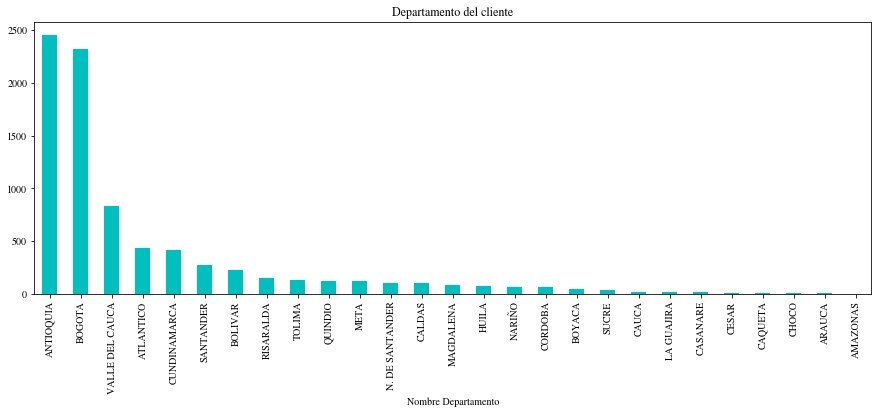

In [ ]:
#Veamos ahora la distribución de contactos por Departamentos

fig = plt.figure(figsize=(15,5))
df1.groupby(df1['Nombre Departamento']).count()['afi_hash64'].sort_values(ascending = False).plot.bar(color = 'c')
plt.title('Departamento del cliente')

## **5. Análisis bivariable**

In [ ]:
import seaborn as sns

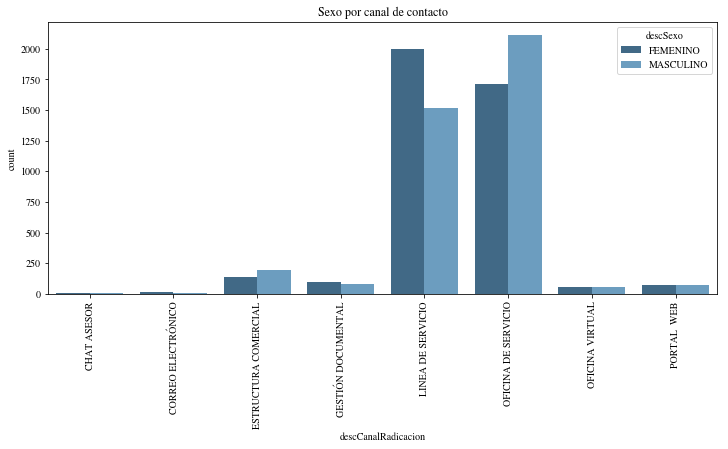

In [ ]:
# ¿Cómo es el comportamiento de los contactos por canal de acuerdo con el sexo del cliente?

df_aux = df.loc[:,["descSexo","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descSexo",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descSexo", palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.title('Sexo por canal de contacto')
plt.show()

La composición entre clientes hombres y mujeres es muy homogéneo, y logramos ver en los canales tradicionales asistidos por un asesor, que las mujeres tienen una ligera tendencia por el canal tefefónico y los hombre por el canal presencial.

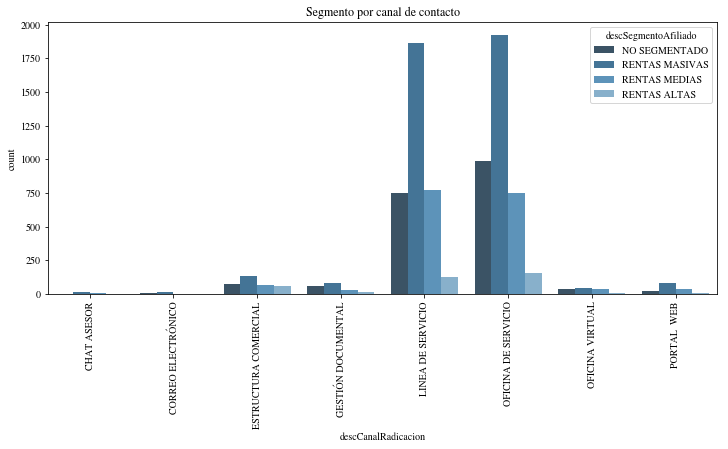

In [ ]:
# Comportamiento de la segmentación del cliente por canal

df_aux = df.loc[:,["descSegmentoAfiliado","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descSegmentoAfiliado",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "descSegmentoAfiliado",palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.title('Segmento por canal de contacto')
plt.show()

En cuanto a los segmentos que mas usan los canales, hay una diferencia importnate es los segmentos rentas masivas por la línea de servicio y oficinas físicas, esto se debe también a que son los canales definidos para atender este tipo de clientes.
Es de resaltar que los clientes rentas altas deberian contactarnos principalmente a traves de su asesor comercial, pero no hay una gran mayoria que sigue usando los canales tradicionales.

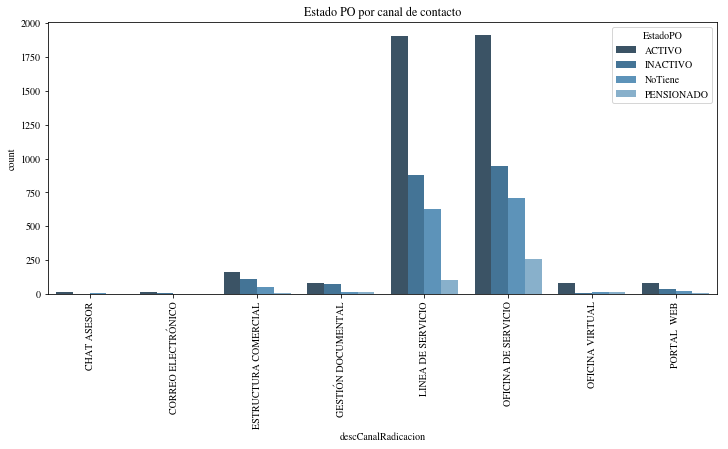

In [ ]:
# Estado en ahorro obligatorio por canal

df_aux = df.loc[:,["EstadoPO","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","EstadoPO",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "EstadoPO",palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.title('Estado PO por canal de contacto')
plt.show()

Podemos notar que los clientes activos en ahorro obligatorio perfieren usar los canales línea de servicio y oficina de servicio.

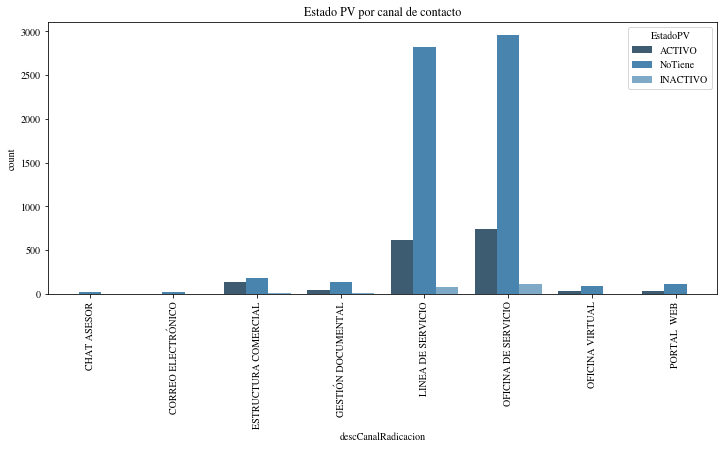

In [ ]:
# Estado en ahorro voluntario por canal

df_aux = df.loc[:,["EstadoPV","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","EstadoPV",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "EstadoPV",palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.title('Estado PV por canal de contacto')
plt.show()

Los clientes que más usan la línea o oficina de servicio no estan activos en los productos de ahorro voluntario

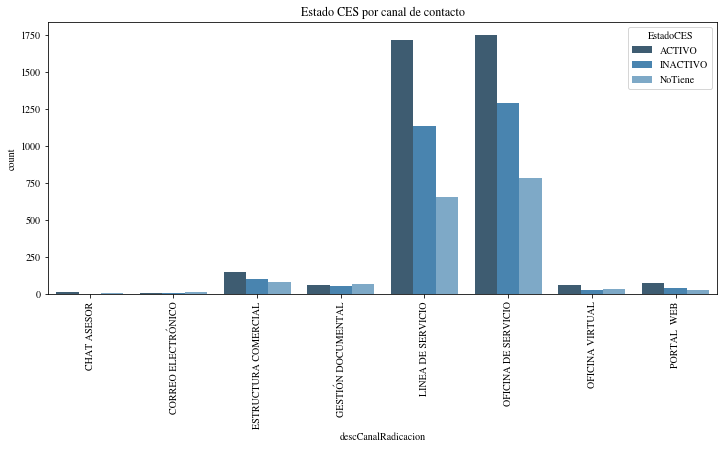

In [ ]:
# Estado en Cesantias por canal

df_aux = df.loc[:,["EstadoCES","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","EstadoCES",]).sum().reset_index()

plt.figure(figsize=(12,5)) 
bars = sns.barplot(x="descCanalRadicacion", y="count", data = df_aux, hue = "EstadoCES",palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.title('Estado CES por canal de contacto')
plt.show()

Los usuarios activos en cesantías utilizan mayormente los canales de oficia y línea de servicio 

In [ ]:
# Principales temas de contacto y canal

df_aux = df.loc[:,["descTema","descCanalRadicacion","afi_hash64"]]
df_aux["count"] = 1
df_aux = df_aux.groupby(["descCanalRadicacion","descTema",]).sum().reset_index()
df_aux = df_aux.sort_values(by= 'count', ascending = False)
df_aux.head(10)

,descCanalRadicacion,descTema,count
33,LINEA DE SERVICIO,CANALES DE ATENCIÓN,1017
34,LINEA DE SERVICIO,CERTIFICADOS,917
44,OFICINA DE SERVICIO,CANALES DE ATENCIÓN,796
45,OFICINA DE SERVICIO,CERTIFICADOS,764
42,OFICINA DE SERVICIO,APORTES Y PLANILLAS,752
40,OFICINA DE SERVICIO,ACTUALIZACIÓN DE DATOS,675
31,LINEA DE SERVICIO,APORTES Y PLANILLAS,638
43,OFICINA DE SERVICIO,ASESORÍA PENSIONAL,488
30,LINEA DE SERVICIO,AFILIACIONES Y TRASLADOS,315
29,LINEA DE SERVICIO,ACTUALIZACIÓN DE DATOS,302


### **5.1 Correlación entre las variables**

In [ ]:
#Cambiemos el tipo de datos de las variables para poder usar un codificación Label Encoder

df1['descTema'] = df1['descTema'].astype('str')
df1['descCanalRadicacion'] = df1['descCanalRadicacion'].astype('str')
df1['Nombre Departamento'] = df1['Nombre Departamento'].astype('str')

In [ ]:
# Codificación de las variables

from sklearn.preprocessing import LabelEncoder # Codificación de etiquetas
LE = LabelEncoder()
df2 = df1[['afi_hash64','descTema','descSexo', 'descSegmentoAfiliado', 'edadAfiliado', 'EstadoPO', 'EstadoPV', 'EstadoCES','Nombre Departamento', 'descCanalRadicacion']]
df2['afi_hash64'] = LE.fit_transform(df1['afi_hash64'])
df2["descTema"] = LE.fit_transform(df1['descTema'])
df2["descSexo"] = LE.fit_transform(df1['descSexo'])
df2["descSegmentoAfiliado"] = LE.fit_transform(df1['descSegmentoAfiliado'])
df2["EstadoPO"] = LE.fit_transform(df1['EstadoPO'])
df2["EstadoPV"] = LE.fit_transform(df1['EstadoPV'])
df2["EstadoCES"] = LE.fit_transform(df1['EstadoCES'])
df2["Nombre Departamento"] = LE.fit_transform(df1['Nombre Departamento'])
df2["descCanalRadicacion"] = LE.fit_transform(df1['descCanalRadicacion'])

In [ ]:
df2.head(5)

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,Nombre Departamento,descCanalRadicacion
0,439,9,1,3,20.0,0,2,0,4,4
1,1112,0,0,1,83.0,2,0,2,22,2
2,1112,0,0,1,83.0,2,0,2,22,2
3,2870,2,1,0,70.0,2,2,1,26,5
4,141,2,0,2,71.0,2,0,2,1,5


In [ ]:
#Correlación entre las varibales predictora y con la variable objetivo:

df2.corr()

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,Nombre Departamento,descCanalRadicacion
afi_hash64,1.000000,-0.010682,0.034009,-0.023279,0.024887,-0.026826,-0.022024,-0.034878,0.001841,0.013963
descTema,-0.010682,1.000000,-0.000718,0.012055,-0.008909,-0.021509,-0.010220,-0.000402,-0.006361,-0.027991
descSexo,0.034009,-0.000718,1.000000,-0.004946,0.056011,0.004659,0.005332,-0.013440,0.077115,0.047559
descSegmentoAfiliado,-0.023279,0.012055,-0.004946,1.000000,-0.181310,-0.497601,-0.156234,-0.440147,-0.125332,0.003173
edadAfiliado,0.024887,-0.008909,0.056011,-0.181310,1.000000,0.054961,-0.134619,0.215583,0.106572,0.016187
EstadoPO,-0.026826,-0.021509,0.004659,-0.497601,0.054961,1.000000,0.021504,0.021047,0.037180,0.033488
EstadoPV,-0.022024,-0.010220,0.005332,-0.156234,-0.134619,0.021504,1.000000,0.003710,0.040089,0.038917
EstadoCES,-0.034878,-0.000402,-0.013440,-0.440147,0.215583,0.021047,0.003710,1.000000,0.139317,-0.020919
Nombre Departamento,0.001841,-0.006361,0.077115,-0.125332,0.106572,0.037180,0.040089,0.139317,1.000000,0.016098
descCanalRadicacion,0.013963,-0.027991,0.047559,0.003173,0.016187,0.033488,0.038917,-0.020919,0.016098,1.000000


Nos interesan las correlaciones entre varibales predictoras inferiores a 0.7 ya que una correlación mayor puede indicar que las varibales no estan proporcionando información adicional al modelo, en este caso las variables son completamente independientes por lo tanto las conservamos todas.

Entre las variables predictoras se puede notar que la mayor correlación esta entre estado de Cesantias con el segmento y con la edad del afiliado y el estado en PO que también influye en el segmento del afiliado.

## **6. Tratamiento de outliers**

In [ ]:
df2.describe()

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,Nombre Departamento,descCanalRadicacion
count,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000,8146.000000
mean,1536.345323,3.274368,0.497177,1.686472,42.406212,0.753744,1.580162,0.736190,8.457402,4.428186
std,874.550932,2.115678,0.500023,1.053000,16.289285,0.913577,0.798722,0.777687,9.034792,0.866574
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,789.250000,2.000000,0.000000,1.000000,34.000000,0.000000,2.000000,0.000000,1.000000,4.000000
50%,1532.500000,4.000000,0.000000,2.000000,42.000000,0.000000,2.000000,1.000000,4.000000,5.000000
75%,2282.750000,5.000000,1.000000,2.000000,53.000000,1.000000,2.000000,1.000000,14.000000,5.000000
max,3033.000000,11.000000,1.000000,3.000000,110.000000,3.000000,2.000000,2.000000,27.000000,7.000000


In [ ]:
# Eliminamos los registros de clientes que de acuerdo con el conocimiento del negocio no nos contactan normalmente

df3 = df2.drop(df.index[ (df['edadAfiliado'] > 90) & (df['edadAfiliado'] < 18)])

In [ ]:
df3.head(5)

,afi_hash64,descTema,descSexo,descSegmentoAfiliado,edadAfiliado,EstadoPO,EstadoPV,EstadoCES,Nombre Departamento,descCanalRadicacion
0,439,9,1,3,20.0,0,2,0,4,4
1,1112,0,0,1,83.0,2,0,2,22,2
2,1112,0,0,1,83.0,2,0,2,22,2
3,2870,2,1,0,70.0,2,2,1,26,5
4,141,2,0,2,71.0,2,0,2,1,5


## **7. Ajuste Modelo**

### **7.1 Separación de datos de entrenamiento**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,:8],df1["descCanalRadicacion"], test_size=0.2, random_state=1, stratify = df1["descCanalRadicacion"])

### **7.2 Modelos inciales**

In [ ]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [ ]:
clfQD = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
clfNB = GaussianNB().fit(X_train, y_train)
clfLR = LogisticRegression().fit(X_train, y_train)

#### **7.2.1 Métricas de los modelos**

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [ ]:
import numpy as np

labels = ['QD', 'NB', 'LR']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(y_test,clfQD.predict(X_test)), accuracy_score(y_test,clfNB.predict(X_test)), accuracy_score(y_test,clfLR.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clfQD.predict(X_test)), balanced_accuracy_score(y_test,clfNB.predict(X_test)), balanced_accuracy_score(y_test,clfLR.predict(X_test))])

print ("El accuracy para los modelos QD, NB, LR respectivamente es:" , Performance[0])
print ("El Balance accuracy para los modelos QD, NB, LR respectivamente es:" , Performance[1])

El accuracy para los modelos QD, NB, LR respectivamente es: [0.5484662576687117, 0.5441717791411043, 0.4901840490797546]
El Balance accuracy para los modelos QD, NB, LR respectivamente es: [0.17671060231801922, 0.15636489824469363, 0.13216859393329983]


Los resultados obtenidos con estos modelos son muy bajos, por lo tanto, no son los adecuados para el problema analizado.

### **7.3 Modelos no parametricos**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clfKNN = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
acc_knn = accuracy_score(y_test,clfKNN.predict(X_test))
bacc_knn = balanced_accuracy_score(y_test,clfQD.predict(X_test))
print ("El accuracy para el modelo KNN e es:" , acc_knn)
print ("El Balance accuracy para el modelo KNN es:" , bacc_knn)

El accuracy para el modelo KNN e es: 0.5682819383259912
El Balance accuracy para el modelo KNN es: 0.17630800061762025


El modelo de K vecinos más cercanos no mejora la métrica de manera significativa.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clfRF = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=0, class_weight='balanced_subsample')
clfRF = clfRF.fit(X_train, y_train)
accRF = accuracy_score(y_test, clfRF.predict(X_test))
baccDF = balanced_accuracy_score(y_test, clfRF.predict(X_test))

print ("El accuracy para los modelo RF respectivamente es:" , accRF)
print ("El Balance accuracy para los modelo FR respectivamente es:" , baccDF)

El accuracy para los modelo RF respectivamente es: 0.31718061674008813
El Balance accuracy para los modelo FR respectivamente es: 0.3737479233813641


En este caso un modelo random forest con class weight con balanceo de las submuestras nos genera un balance accuracy más alto, por lo tanto es mejor modelo hasta el momento.

### **7.4 Buscando los mejores parámetros para el mejor modelo encontrado**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_b= RandomForestClassifier(class_weight='balanced_subsample', random_state=0)

parameters = {'n_estimators':[20,40,70,100], 'max_depth':[2,4,6,8], 'max_features':[5,6,8,9]}

clfRF = GridSearchCV(estimator= clf_b, param_grid=parameters,  scoring='balanced_accuracy')
clfRF.fit(X_train,y_train)
clfRF.best_estimator_

In [ ]:
accRF = accuracy_score(y_test, clfRF.predict(X_test))
baccDF = balanced_accuracy_score(y_test, clfRF.predict(X_test))

print ("El accuracy para los modelo RF respectivamente es:" , accRF)
print ("El Balance accuracy para los modelo FR respectivamente es:" , baccDF)

El accuracy para los modelo RF respectivamente es: 0.4052863436123348
El Balance accuracy para los modelo FR respectivamente es: 0.40793406691728895


Al mejorar los hiperparámetros del modelo random forest logramos mejorar un poco la predicción del mismo.

## **8. Recomendaciones para próximas iteraciones**

1. Trabajar con clientes únicos o incluir información adicional que pueda diferenciar los contactos de un mismo cliente.
2. Adicionar otras variables que ayuden a caracterizar mucho mejor al cliente.
3. Probar un modelo para los principales canales, con el fin de identificar si realmente son separables.
4. Aumentar el tamaño de la muestra.